Found 557 images belonging to 2 classes.
Found 140 images belonging to 2 classes.


C:\Users\naman\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
18/18 ━━━━━━━━━━━━━━━━━━━━ 108s 5s/step - accuracy: 0.5338 - loss: 2.5700 - val_accuracy: 0.5000 - val_loss: 1.3490
Epoch 2/5
18/18 ━━━━━━━━━━━━━━━━━━━━ 75s 4s/step - accuracy: 0.5743 - loss: 1.2546 - val_accuracy: 0.6000 - val_loss: 0.6787
Epoch 3/5
18/18 ━━━━━━━━━━━━━━━━━━━━ 74s 4s/step - accuracy: 0.6452 - loss: 0.7131 - val_accuracy: 0.5071 - val_loss: 1.6084
Epoch 4/5
18/18 ━━━━━━━━━━━━━━━━━━━━ 73s 4s/step - accuracy: 0.5951 - loss: 1.0699 - val_accuracy: 0.6000 - val_loss: 0.7515
Epoch 5/5
18/18 ━━━━━━━━━━━━━━━━━━━━ 75s 4s/step - accuracy: 0.6382 - loss: 0.7390 - val_accuracy: 0.6000 - val_loss: 0.8529
Test Accuracy: 0.6000000238418579
Test Loss: 0.8529209494590759


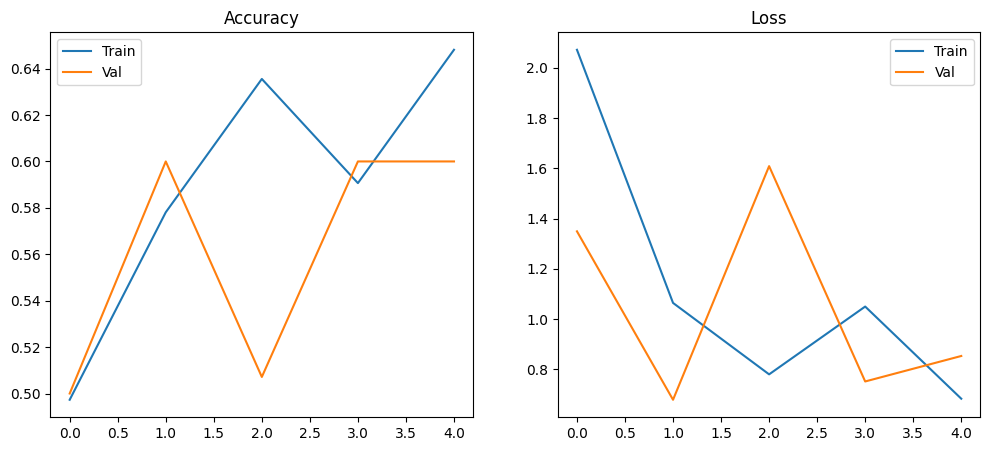

In [1]:
# ---------------------------------------------------------
# ASSIGNMENT 7: Transfer Learning for Image Classification
#
# • Use a pre-trained model (ResNet50).
# • Freeze base layers and train only top layers.
# • Train on cats vs dogs dataset.
# • Plot accuracy and loss curves.
# ---------------------------------------------------------

import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.models import Model

# -----------------------------
# LOAD DATA FROM FOLDERS
# -----------------------------
train_dir = "cat_dog_dataset/train"
test_dir  = "cat_dog_dataset/test"

gen = ImageDataGenerator(rescale=1/255)

train = gen.flow_from_directory(
    train_dir,
    target_size=(224,224),
    batch_size=32,
    class_mode='categorical'
)

test = gen.flow_from_directory(
    test_dir,
    target_size=(224,224),
    batch_size=32,
    class_mode='categorical'
)

# -----------------------------
# LOAD PRETRAINED RESNET50
# -----------------------------
base = ResNet50(
    weights='imagenet',
    include_top=False,
    input_shape=(224,224,3)
)

for layer in base.layers:
    layer.trainable = False  # freeze pretrained layers

# -----------------------------
# ADD CLASSIFICATION HEAD
# -----------------------------
x = Flatten()(base.output)
output = Dense(2, activation='softmax')(x)

model = Model(inputs=base.input, outputs=output)

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# -----------------------------
# TRAIN MODEL
# -----------------------------
history = model.fit(
    train,
    epochs=5,
    validation_data=test,
    verbose=1
)

# -----------------------------
# EVALUATE MODEL
# -----------------------------
loss, acc = model.evaluate(test, verbose=0)
print("Test Accuracy:", acc)
print("Test Loss:", loss)

# -----------------------------
# PLOT GRAPHS
# -----------------------------
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Val')
plt.title("Accuracy")
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Val')
plt.title("Loss")
plt.legend()

plt.show()
